<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/SelecaoFeatures/PreparacaoModelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação dos Dados e Seleção de Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Binarizer, LabelEncoder, MultiLabelBinarizer

In [ ]:
# Caminho onde o dataset estava localizado no meu drive. No GitHub, estou disponibilizando ele dentro da branch LimpezaDataset.
df = pd.read_csv('/content/drive/MyDrive/BackEnd/GoodReads_cleanedwoImput.csv')
df.shape

(84054, 9)

### Matriz de Correlação

Antes de selecionar as features (já se tendo uma ideia do que é relevante, levando em consideração a análise exploratória).

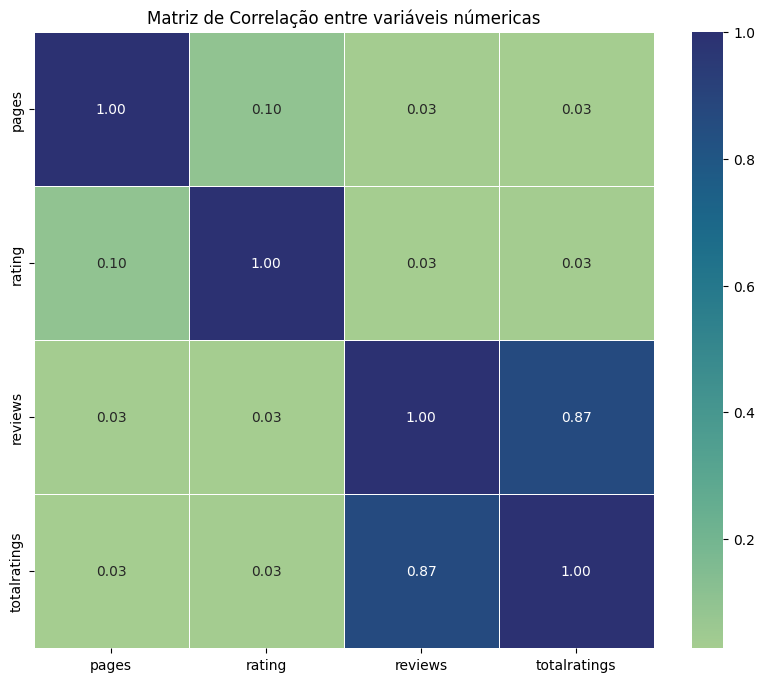

In [ ]:
# Matriz de Correlação (apenas variáveis numéricas)
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlação entre variáveis númericas')
plt.show()

Analisando a matriz, consegue-se afirmar que:

1. **Reviews** e **totalratings** apresentam uma correlação alta (***0.87***), o que faz sentido, pois é comum que livros com mais avaliações totais tenham um número maior de resenhas (escritas).
2. **pages** não apresenta uma forte correlação com nenhuma outra variável, não tendo uma relação linear relevante com as demais variáveis.
3.   **rating** também não possui uma correlação forte com as outras variáveis, indicando que a avaliação não depende diretamente das outras variáveis numéricas.

Vale lembrar que a correlação mede apenas a força da relação linear entre duas variáveis, não a causalidade direta, como é o caso de totalratings e rating.

O fato de um livro ter uma nota (rating) porque tem avaliações (totalratings) não significa, necessariamente, que a nota média (que é o rating) tem uma relação linear forte com o número de avaliações.

Um livro pode ter muitos ou poucos ratings, mas a média das notas não depende diretamente da quantidade, apenas dos valores das notas.



---
### Seleção de Features


Existem algumas variáveis categóricas no dataset, sendo necesário convertê-las em númericas, para que possam ser enquandradas no modelos de aprendizado de máquina.

In [ ]:
# Codificar variáveis categóricas usando Label Encoding
label_encoder = LabelEncoder()

for column in ['author', 'bookformat', 'title']:
    df[column] = label_encoder.fit_transform(df[column])

A coluna de gênero possui MUITOS possíveis gêneros, sem mencionar que um livro pode se encaixar em mais de um tipo de gênero.

Durante a preparação, tentei converter utilizando PCA em notebooks a parte, mas o dataset ficava SUPER pesado e eu só conseguia aplicar ao modelo parte do conjunto de dados (cerca de 40% do dataset inteiro).

Isso sem mencionar, que quase toda vez o Google Collab renicializava pela falta de recursos computacionais (memória RAM) quando eu aplicava o scikit-learn com o modelo preditivo.

Uma forma de contornar a situação foi utilizando a ferramenta MultiLabelBinarizer da biblioteca do scikit, transformando-os em uma representação binária.

In [ ]:
# Codificar a coluna 'genre' usando MultiLabelBinarizer para lidar com múltiplos gêneros
mlb = MultiLabelBinarizer()
df['genre'] = df['genre'].apply(lambda x: x.split(','))
genres_encoded = mlb.fit_transform(df['genre'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)


In [ ]:
#Concatenando os gêneros codificados ao DataFrame original (e descartando a coluna original de gêneros)
df = pd.concat([df.drop(columns=['genre']), genres_df], axis=1)

A coluna de descrição, por ser completamente textual e apenas ser a descrição/sinopse do livro, não vai ser utilizada diretamente nos modelos de aprendizado de máquina.

In [ ]:
# Drop da descrição e da nota do livro (pois é o que queremos prever no modelo)
X = df.drop(columns=['rating', 'desc'])
y = df['rating']

Agora, precisamos binarizar a variável 'rating', pois as notas podem variar bastante devido a sua formação ser uma média (nota dos leitores/total de avaliações).

Na minha preparação, converti 'rating' para quando o livro possuir nota **maior ou igual** a 4.0, ser considerado uma boa avaliação, caso contrário, será uma má nota.

In [ ]:
# Binarizando a variável 'rating' para binária (rating >= 4.0 será considerado uma boa avaliação)
binarizer = Binarizer(threshold=4.0)
y_binary = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()

Por fim, com o modelo categorizado, vamos salvar essa versão do dataset, coloquei duas linhas diferentes:

1. Salva diretamente no **MEU** drive, na pasta que fiz para conter toda a parte relacionada a datasets (base bruta, versão imputada, não imputado) e agora a codificada.


```
df.to_csv('/content/drive/MyDrive/BackEnd/Treinamento/GoodReadsEncoded.csv', index=False)
```


2. Versão que salva diretamente no ambiente local do Collab.



```
df.to_csv('GoodReadsEncoded.csv', index=False)
```



In [ ]:
#df.to_csv('/content/drive/MyDrive/BackEnd/Treinamento/GoodReadsEncoded.csv', index=False)
df.to_csv('GoodReadsEncoded.csv', index=False)

In [ ]:
# Checando apenas como ficou o tamanho final do dataset encoded.
df.shape

(84054, 1187)